In [64]:
import pandas as pd

df_raw = pd.read_csv('files/combined_classified.csv')
df_raw.head()

,title,link,published,retrieved_at,author,abstract,category,isRelevant,relevanceSource,classified_at
0,Cooperative Relative Localization in MAV Swarm...,https://arxiv.org/abs/2405.18234,NaN,06/03/2024 00:00,"Changrui Liu, Sven U. Pfeiffer, Guido C. H. E....",Relative localization (RL) is essential for th...,cs.RO,0.0,Manual,06/04/2024 11:19
1,Detection-Correction Structure via General Lan...,https://arxiv.org/abs/2405.17804,NaN,06/03/2024 00:00,"Wei Li, Houfeng Wang",Grammatical error correction (GEC) is a task d...,cs.CL,0.0,Manual,06/04/2024 11:19
2,Average and Expected Distortion of Voronoi Pat...,https://arxiv.org/abs/2012.03350,NaN,06/03/2024 00:00,"Herbert Edelsbrunner, Anton Nikitenko",The approximation of a circle with the edges o...,"math.MG, math.PR",0.0,Manual,06/04/2024 11:19
3,Asynchronous BFT Asset Transfer: Quasi-Anonymo...,https://arxiv.org/abs/2405.18072,NaN,06/03/2024 00:00,"Timoth\'e Albouy (IRISA), Emmanuelle Anceaume ...",This article introduces a new asynchronous Byz...,cs.DC,0.0,Manual,06/04/2024 11:19
4,ReStorEdge: An edge computing system with reus...,https://arxiv.org/abs/2405.17263,NaN,06/03/2024 00:00,Adrian-Cristian Nicolaescu (University College...,This paper investigates an edge computing syst...,"cs.ET, cs.DB, cs.DC, cs.NI",0.0,Manual,06/04/2024 11:19


# VISUALIZACAO DOS DADOS

In [65]:
df = df_raw.copy()

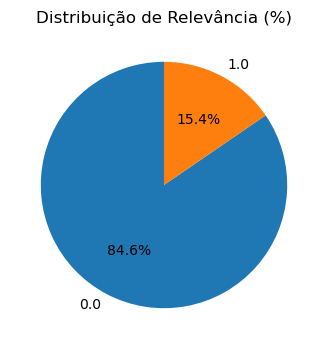

In [66]:
pcts = df['isRelevant'].value_counts(normalize=True) * 100
plt.figure(figsize=(4,4))
plt.pie(pcts, labels=pcts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Relevância (%)')
plt.show()

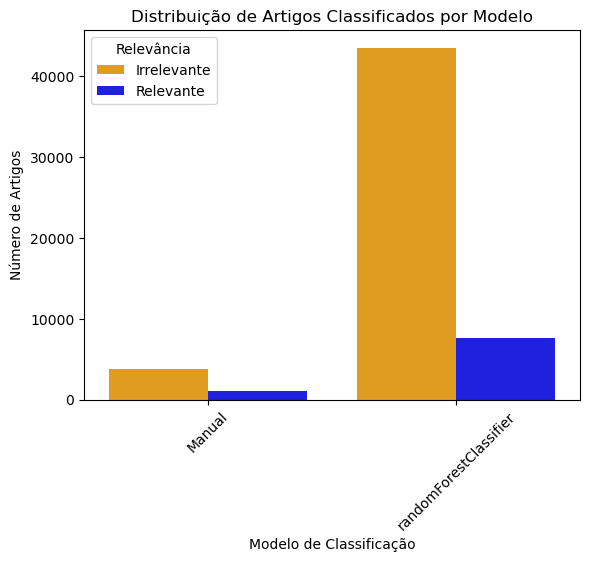

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='relevanceSource', hue='isRelevant', palette=['orange', 'blue'])
plt.title('Distribuição de Artigos Classificados por Modelo')
plt.xlabel('Modelo de Classificação')
plt.ylabel('Número de Artigos')
plt.xticks(rotation=45)
plt.legend(title='Relevância', labels=['Irrelevante', 'Relevante'])
plt.show()


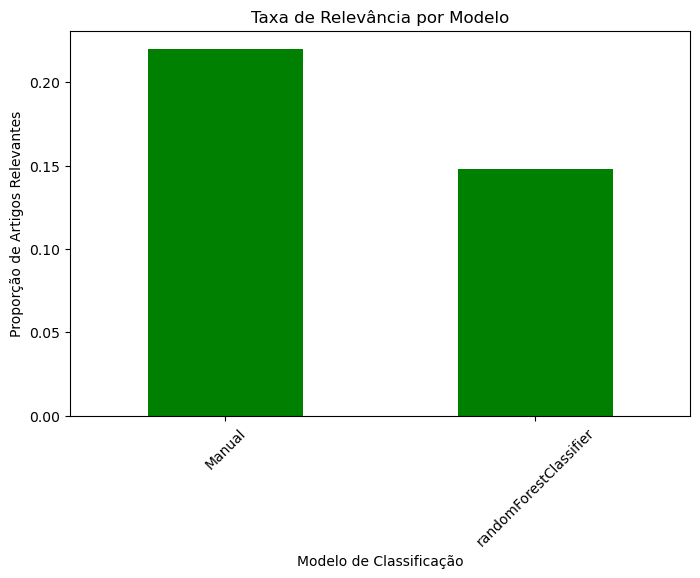

In [68]:
relevant_by_model = df.groupby('relevanceSource')['isRelevant'].mean()

relevant_by_model.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Taxa de Relevância por Modelo')
plt.xlabel('Modelo de Classificação')
plt.ylabel('Proporção de Artigos Relevantes')
plt.xticks(rotation=45)
plt.show()


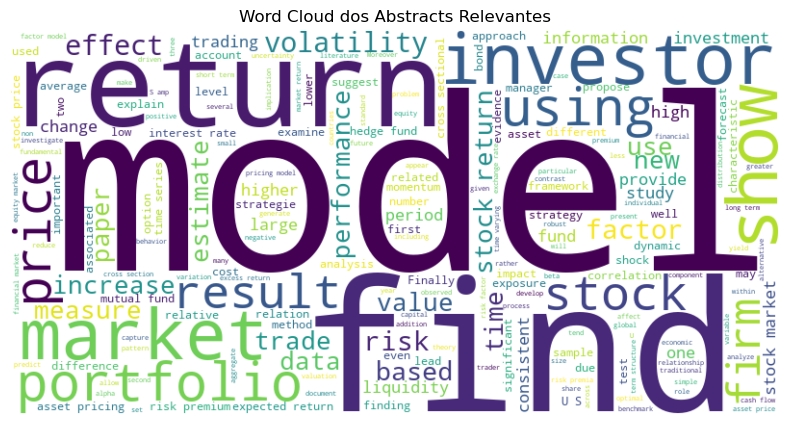

In [69]:
from wordcloud import WordCloud

relevant_abstracts = ' '.join(df[df['isRelevant'] == 1]['abstract'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(relevant_abstracts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dos Abstracts Relevantes')
plt.show()


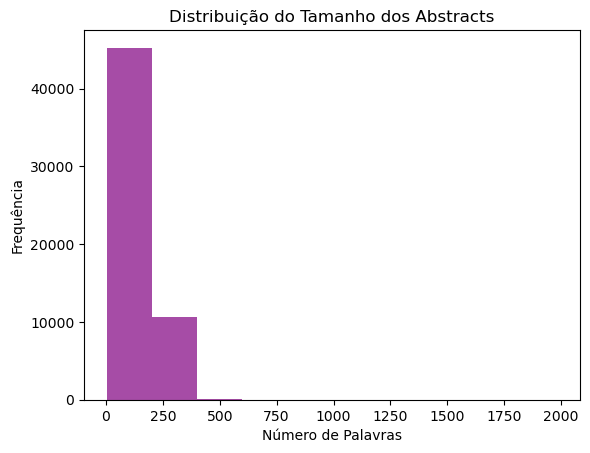

In [70]:
df['abstract_length'] = df['abstract'].str.split().str.len()

plt.hist(df['abstract_length'],color='purple', alpha=0.7)
plt.title('Distribuição do Tamanho dos Abstracts')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()


In [71]:
df.sort_values(by='abstract_length', ascending=False, inplace=False).head()

,title,link,published,retrieved_at,author,abstract,category,isRelevant,relevanceSource,classified_at,abstract_length
34028,The Economic Crisis and the Fiscal Crisis: 200...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,02/11/2011 00:00,06/20/2024 14:52,"William G. Gale, Alan J. Auerbach","At the beginning of the decade, the U.S. fisca...",NaN,0.0,randomForestClassifier,08/16/2024 11:53,1985.0
20550,An Institutional Innovation to Reduce the Agen...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,3/1/2023 15:48,06/07/2024 11:04,"Yakov Amihud, Kenneth Garbade, Marcel Kahan",Debt financing gives rise to conflicts of inte...,NaN,0.0,Manual,06/11/2024 16:24,840.0
13498,Ten Years After: Reflections on the Global Fin...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,11/12/2019 18:17,06/07/2024 16:37,"Laurence B. Siegel, Luis Garc&iacute;a-Feij&oa...",The “Ten Years After” Brief contains summaries...,NaN,0.0,randomForestClassifier,08/16/2024 11:53,810.0
15176,Financial Risk Management and Explainable Trus...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,7/8/2021 6:35,06/07/2024 16:33,"Sebastian Fritz-Morgenthal, Bernhard Hein, Joc...",This perspective paper is based on several ses...,NaN,0.0,randomForestClassifier,08/16/2024 11:53,796.0
13651,A machine learning approach to support decisio...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,12/27/2022 20:05,06/07/2024 16:37,"Piero Mazzarisi, Adele Ravagnani, Paola Deriu,...",<b>English Abstract</b>: The identification of...,NaN,0.0,randomForestClassifier,08/16/2024 11:53,763.0


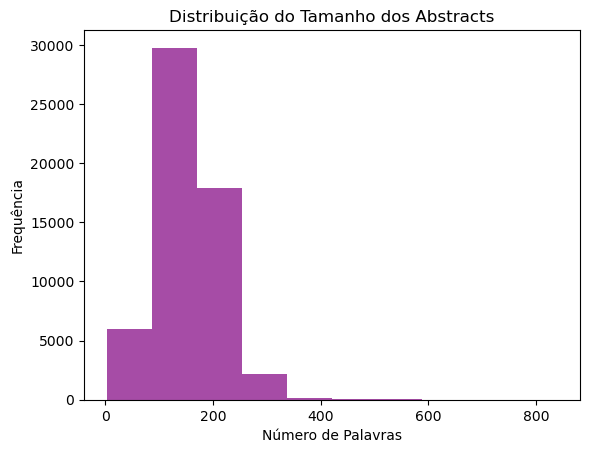

In [73]:
# remove o artigo com o abstract muito maior q os outros
# df = df.drop(34028)
df['abstract_length'] = df['abstract'].str.split().str.len()

plt.hist(df['abstract_length'],color='purple', alpha=0.7)
plt.title('Distribuição do Tamanho dos Abstracts')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_7192\937140847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isRelevant', y='abstract_length', data=df, palette=['orange', 'blue'])


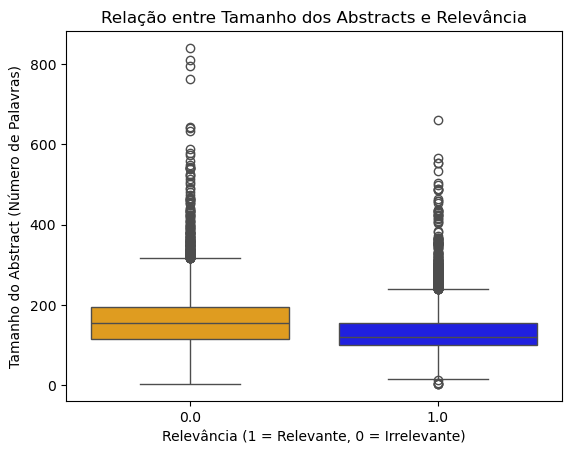

In [74]:
import seaborn as sns

sns.boxplot(x='isRelevant', y='abstract_length', data=df, palette=['orange', 'blue'])
plt.title('Relação entre Tamanho dos Abstracts e Relevância')
plt.xlabel('Relevância (1 = Relevante, 0 = Irrelevante)')
plt.ylabel('Tamanho do Abstract (Número de Palavras)')
plt.show()


# PREPARANDO DADOS

In [76]:
df_train = df.copy()
df_train.head()

,title,link,published,retrieved_at,author,abstract,category,isRelevant,relevanceSource,classified_at,abstract_length
0,Cooperative Relative Localization in MAV Swarm...,https://arxiv.org/abs/2405.18234,NaN,06/03/2024 00:00,"Changrui Liu, Sven U. Pfeiffer, Guido C. H. E....",Relative localization (RL) is essential for th...,cs.RO,0.0,Manual,06/04/2024 11:19,219.0
1,Detection-Correction Structure via General Lan...,https://arxiv.org/abs/2405.17804,NaN,06/03/2024 00:00,"Wei Li, Houfeng Wang",Grammatical error correction (GEC) is a task d...,cs.CL,0.0,Manual,06/04/2024 11:19,146.0
2,Average and Expected Distortion of Voronoi Pat...,https://arxiv.org/abs/2012.03350,NaN,06/03/2024 00:00,"Herbert Edelsbrunner, Anton Nikitenko",The approximation of a circle with the edges o...,"math.MG, math.PR",0.0,Manual,06/04/2024 11:19,66.0
3,Asynchronous BFT Asset Transfer: Quasi-Anonymo...,https://arxiv.org/abs/2405.18072,NaN,06/03/2024 00:00,"Timoth\'e Albouy (IRISA), Emmanuelle Anceaume ...",This article introduces a new asynchronous Byz...,cs.DC,0.0,Manual,06/04/2024 11:19,152.0
4,ReStorEdge: An edge computing system with reus...,https://arxiv.org/abs/2405.17263,NaN,06/03/2024 00:00,Adrian-Cristian Nicolaescu (University College...,This paper investigates an edge computing syst...,"cs.ET, cs.DB, cs.DC, cs.NI",0.0,Manual,06/04/2024 11:19,129.0


In [89]:
df_train['text'] = 'title: ' + df['title'] + ' | author: ' + df['author'] + ' | abstract: ' + df['abstract']
df_train['isRelevant'] = df['isRelevant'].astype(int)

In [90]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train['text'], df_train['isRelevant'], test_size=0.2
)

ImportError: cannot import name '_fill_or_add_to_diagonal' from 'sklearn.utils._array_api' (C:\Users\T-Gamer\anaconda3\envs\RSS\Lib\site-packages\sklearn\utils\_array_api.py)

# TREINAMENTO